# **Homework 5 - Sleep Data**

## Question 1
Load "msleep.csv" data into dataframe

In [114]:
import pandas as pd
import numpy as np

sleep = pd.read_csv('msleep.csv')
sleep.head()


,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


## Question 2
Split the dataframe into three - the good, the bad, and the ugly

In [115]:
nan_count = sleep.isna().sum(axis=1)
good = sleep[nan_count == 0]
bad = sleep[nan_count == 1]
ugly = sleep[nan_count > 1]


## Question 3
Fill the NaN values in the "bad" dataframe with the column mean for those with numeric values, and column mode for those with categorical values

In [116]:
bad = bad.copy() # Avoiding SettingWithCopyWarning
for column in bad.columns:
    if bad[column].dtype in [np.float64]:
        mean_value = bad[column].mean()
        bad.fillna({column: mean_value}, inplace=True)
    else:
        mode_value = bad[column].mode()
        bad.fillna({column: mode_value[0]}, inplace=True)
bad.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.3,0.190772,20.49
10,Goat,Capri,herbi,Artiodactyla,lc,5.3,0.6,0.620000,18.7,0.115000,33.50
14,Star-nosed mole,Condylura,omni,Soricomorpha,lc,10.3,2.2,0.620000,13.7,0.001000,0.06
18,Tree hyrax,Dendrohyrax,herbi,Hyracoidea,lc,5.3,0.5,0.620000,18.7,0.012300,2.95
23,Donkey,Equus,herbi,Perissodactyla,domesticated,3.1,0.4,0.620000,20.9,0.419000,187.00


## Question 4
Convert the "order" column into dummies with prefix "order_"

In [117]:
good = pd.get_dummies(good, columns=['order'], prefix='order_')
good.head()


,name,genus,vore,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt,order__Artiodactyla,order__Carnivora,order__Chiroptera,order__Cingulata,order__Didelphimorphia,order__Erinaceomorpha,order__Lagomorpha,order__Perissodactyla,order__Rodentia,order__Soricomorpha
3,Greater short-tailed shrew,Blarina,omni,lc,14.9,2.3,0.133333,9.1,0.00029,0.019,False,False,False,False,False,False,False,False,False,True
4,Cow,Bos,herbi,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000,True,False,False,False,False,False,False,False,False,False
8,Dog,Canis,carni,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000,False,True,False,False,False,False,False,False,False,False
11,Guinea pig,Cavis,herbi,domesticated,9.4,0.8,0.216667,14.6,0.00550,0.728,False,False,False,False,False,False,False,False,True,False
13,Chinchilla,Chinchilla,herbi,domesticated,12.5,1.5,0.116667,11.5,0.00640,0.420,False,False,False,False,False,False,False,False,True,False


## Question 5
Cut the "bodyweight" column into 10 bins and return their counts

In [118]:
bodyweight_bins = pd.cut(good['bodywt'], bins=10)
print(bodyweight_bins.value_counts().sort_index())

bodywt
(-0.595, 60.004]      16
(60.004, 120.004]      1
(120.004, 180.003]     0
(180.003, 240.003]     1
(240.003, 300.002]     0
(300.002, 360.002]     0
(360.002, 420.001]     0
(420.001, 480.001]     0
(480.001, 540.0]       1
(540.0, 600.0]         1
Name: count, dtype: int64


In [119]:
# Logarithmically bin the "bodyweight" column for better distribution
min = good['bodywt'].min()
max = good['bodywt'].max()
log_bins = pd.cut(good['bodywt'], bins=np.logspace(np.log10(min), np.log10(max), num=10))
print(log_bins.value_counts().sort_index())

bodywt
(0.005, 0.0183]      1
(0.0183, 0.0672]     3
(0.0672, 0.247]      3
(0.247, 0.904]       4
(0.904, 3.317]       3
(3.317, 12.164]      1
(12.164, 44.611]     1
(44.611, 163.605]    1
(163.605, 600.0]     2
Name: count, dtype: int64


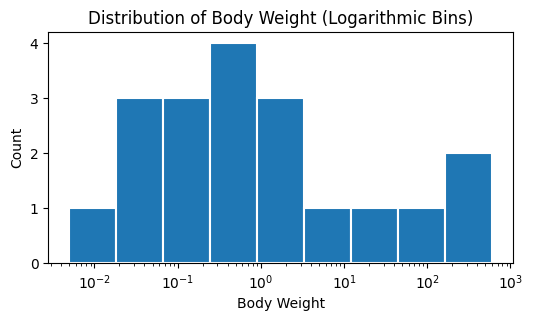

In [120]:
# Visualization
def visualize_bw(df):
    import matplotlib.pyplot as plt
    min_val = df['bodywt'].min()
    max_val = df['bodywt'].max()
    bin_edges = np.logspace(np.log10(min_val), np.log10(max_val), num=10)
    
    plt.figure(figsize=(6, 3))
    plt.hist(df['bodywt'], bins=bin_edges,
             edgecolor='white',
             linewidth=1.5,
             )
    plt.xlabel('Body Weight')
    plt.ylabel('Count')
    plt.title('Distribution of Body Weight (Logarithmic Bins)')
    plt.xscale('log')
    plt.show()

visualize_bw(good)

## Question 6
Cap the "bodyweight" column to 100

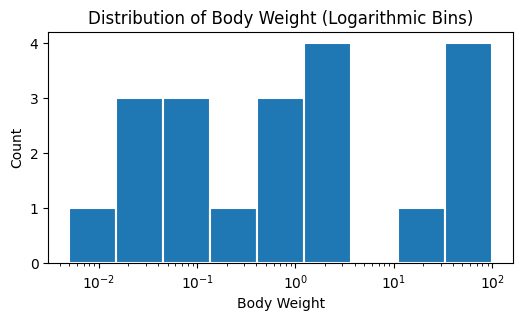

In [121]:
good['bodywt'] = good['bodywt'].clip(upper=100)
visualize_bw(good)

## Question 7
Perform the same operation on the bad dataframe